# Анализ реальных данных по COVID-19

Основой примера послужила статья: https://proglib.io/p/koronavirus-analiz-dannyh-bez-panikerskih-nastroeniy-2020-02-20

Источник данных: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/covid_19_data.csv')

In [3]:
data.shape

(107156, 8)

Посмотрим на структуру файла, выведем первые 5 строк.

In [4]:
data.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

Столбец `Sno` выглядит как номер строки и не имеет значения для анализа. В столбце `Last Update` отображены те же значения, что и в столбце `ObservationDate`, за исключением нескольких случаев, когда числа обновлялись позже. Удалим столбцы `Sno` и `Last Update`.

In [5]:
data.drop(["SNo", "Last Update"], axis=1, inplace=True)
data

ObservationDate     Province/State  Country/Region  Confirmed  Deaths  \
0           01/22/2020              Anhui  Mainland China        1.0     0.0   
1           01/22/2020            Beijing  Mainland China       14.0     0.0   
2           01/22/2020          Chongqing  Mainland China        6.0     0.0   
3           01/22/2020             Fujian  Mainland China        1.0     0.0   
4           01/22/2020              Gansu  Mainland China        0.0     0.0   
...                ...                ...             ...        ...     ...   
107151      09/10/2020  Zaporizhia Oblast         Ukraine     2081.0    30.0   
107152      09/10/2020            Zeeland     Netherlands     1101.0    72.0   
107153      09/10/2020           Zhejiang  Mainland China     1278.0     1.0   
107154      09/10/2020    Zhytomyr Oblast         Ukraine     3938.0    79.0   
107155      09/10/2020       Zuid-Holland     Netherlands    22016.0  1353.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
107151     1049.0  
107152        0.0  
107153     1268.0  
107154     2309.0  
107155        0.0  

[107156 rows x 6 columns]

Посмотрим, какие данные предоставляют оставшиеся 6 столбцов.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107156 entries, 0 to 107155
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ObservationDate  107156 non-null  object 
 1   Province/State   73987 non-null   object 
 2   Country/Region   107156 non-null  object 
 3   Confirmed        107156 non-null  float64
 4   Deaths           107156 non-null  float64
 5   Recovered        107156 non-null  float64
dtypes: float64(3), object(3)
memory usage: 4.9+ MB


Кроме `Province/State` все столбцы целиком заполнены. Это объясняется тем, что долгое время для ряда стран, например, России, указывалась только страна, без указания области.


Проверим данные на дубликаты. Метод `duplicated()` возвращает серию логических значений (значения равны `True`, если аналогичная строка уже имеется в наборе данных). Проверим, что выходные данные показывают, что никакие две записи не имеют одинаковую страну, область и дату.

In [7]:
np.sum(data.duplicated(['Country/Region', 'Province/State', 'ObservationDate']))

4

Сумма булевых значений может быть равна нулю только если все значения `False`. Получается, 4 значения из набора данных не являются уникальными.

In [69]:
# df = pd.DataFrame({"A":["foo", "foo", "foo", "bar"], "B":[0,1,1,1], "C":["A","A","B","A"]})
# df
# sum(df.duplicated(['A', 'C']))
# df.drop_duplicates(subset=['A', 'C'], keep='last')

In [8]:
data = data.drop_duplicates(subset=['Country/Region', 'Province/State', 'ObservationDate'], keep='first')

sum(data.duplicated(['Country/Region', 'Province/State', 'ObservationDate']))

0

Отлично, дубликатов больше нет.

Найдем все страны, в которых были зарегистрированы случаи обнаружения коронавируса.

In [9]:
country_list = data['Country/Region'].unique()

print(f'Коронавирус COVID19 обнаружен в {country_list.size} странах:')

for country in sorted(country_list):
    print(f'- {country}')

Коронавирус COVID19 обнаружен в 223 странах:
-  Azerbaijan
- ('St. Martin',)
- Afghanistan
- Albania
- Algeria
- Andorra
- Angola
- Antigua and Barbuda
- Argentina
- Armenia
- Aruba
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahamas, The
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burma
- Burundi
- Cabo Verde
- Cambodia
- Cameroon
- Canada
- Cape Verde
- Cayman Islands
- Central African Republic
- Chad
- Channel Islands
- Chile
- Colombia
- Comoros
- Congo (Brazzaville)
- Congo (Kinshasa)
- Costa Rica
- Croatia
- Cuba
- Curacao
- Cyprus
- Czech Republic
- Denmark
- Diamond Princess
- Djibouti
- Dominica
- Dominican Republic
- East Timor
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Faroe Islands
- Fiji
- Finland
- France
- French Guiana
- Gabon
- Gambia
- Gambia, The
- Georgia
- Germany
- Ghana
- Gibraltar


Можно заметить, что среди стран указаны `Others`:

In [10]:
data[data['Country/Region'] == 'Others']

ObservationDate                Province/State Country/Region  Confirmed  \
933       02/07/2020                   Cruise Ship         Others       61.0   
1005      02/08/2020                   Cruise Ship         Others       61.0   
1077      02/09/2020  Diamond Princess cruise ship         Others       64.0   
1143      02/10/2020  Diamond Princess cruise ship         Others      135.0   
1215      02/11/2020  Diamond Princess cruise ship         Others      135.0   
1286      02/12/2020  Diamond Princess cruise ship         Others      175.0   
1359      02/13/2020  Diamond Princess cruise ship         Others      175.0   
1433      02/14/2020  Diamond Princess cruise ship         Others      218.0   
1506      02/15/2020  Diamond Princess cruise ship         Others      285.0   
1578      02/16/2020  Diamond Princess cruise ship         Others      355.0   
1652      02/17/2020  Diamond Princess cruise ship         Others      454.0   
1725      02/18/2020  Diamond Princess cruise ship         Others      542.0   
1798      02/19/2020  Diamond Princess cruise ship         Others      621.0   
1873      02/20/2020  Diamond Princess cruise ship         Others      634.0   
1950      02/21/2020  Diamond Princess cruise ship         Others      634.0   
2034      02/22/2020  Diamond Princess cruise ship         Others      634.0   
2118      02/23/2020  Diamond Princess cruise ship         Others      691.0   
2204      02/24/2020  Diamond Princess cruise ship         Others      691.0   
2294      02/25/2020  Diamond Princess cruise ship         Others      691.0   
2388      02/26/2020  Diamond Princess cruise ship         Others      705.0   
2489      02/27/2020  Diamond Princess cruise ship         Others      705.0   
2595      02/28/2020  Diamond Princess cruise ship         Others      705.0   
2709      02/29/2020  Diamond Princess cruise ship         Others      705.0   
2829      03/01/2020  Diamond Princess cruise ship         Others      705.0   
2954      03/02/2020  Diamond Princess cruise ship         Others      705.0   
3095      03/03/2020  Diamond Princess cruise ship         Others      706.0   
3246      03/04/2020  Diamond Princess cruise ship         Others      706.0   
3406      03/05/2020  Diamond Princess cruise ship         Others      706.0   
3579      03/06/2020  Diamond Princess cruise ship         Others      696.0   
3780      03/07/2020  Diamond Princess cruise ship         Others      696.0   
4005      03/08/2020  Diamond Princess cruise ship         Others      696.0   
4261      03/09/2020  Diamond Princess cruise ship         Others      696.0   
4527      03/10/2020  Diamond Princess cruise ship         Others      696.0   
4733      03/11/2020  Diamond Princess cruise ship         Others      696.0   
4950      03/12/2020  Diamond Princess cruise ship         Others      696.0   
5213      03/13/2020  Diamond Princess cruise ship         Others      696.0   
5404      03/14/2020  Diamond Princess cruise ship         Others      696.0   
5656      03/15/2020  Diamond Princess cruise ship         Others      696.0   
5915      03/16/2020  Diamond Princess cruise ship         Others      696.0   
6188      03/17/2020  Diamond Princess cruise ship         Others      696.0   
6465      03/18/2020  Diamond Princess cruise ship         Others      712.0   
6751      03/19/2020  Diamond Princess cruise ship         Others      712.0   
7045      03/20/2020  Diamond Princess cruise ship         Others      712.0   
7349      03/21/2020  Diamond Princess cruise ship         Others      712.0   
7800      03/22/2020  Diamond Princess cruise ship         Others      712.0   
8098      03/23/2020  Diamond Princess cruise ship         Others      712.0   

      Deaths  Recovered  
933      0.0        0.0  
1005     0.0        0.0  
1077     0.0        0.0  
1143     0.0        0.0  
1215     0.0        0.0  
1286     0.0        0.0  
1359     0.0        0.0  
1433     0.0        0.0  
1506     0

То есть эти случаи произошли не в странах, а на большом круизном судне, имени которого вначале  не знали, а потом было определено, что это круизный лайнер Diamond Princess («Бриллиантовая принцесса»). 

Посмотрим на ситуацию по России, отраженную в агрегированных данных.

In [11]:
data[data['Country/Region'] == 'Russia']

ObservationDate                  Province/State Country/Region  \
482         01/31/2020                             NaN         Russia   
540         02/01/2020                             NaN         Russia   
610         02/02/2020                             NaN         Russia   
677         02/03/2020                             NaN         Russia   
745         02/04/2020                             NaN         Russia   
...                ...                             ...            ...   
107128      09/10/2020                  Vologda Oblast         Russia   
107130      09/10/2020                 Voronezh Oblast         Russia   
107142      09/10/2020  Yamalo-Nenets Autonomous Okrug         Russia   
107144      09/10/2020                Yaroslavl Oblast         Russia   
107148      09/10/2020                Zabaykalsky Krai         Russia   

        Confirmed  Deaths  Recovered  
482           2.0     0.0        0.0  
540           2.0     0.0        0.0  
610           2.0     0.0        0.0  
677           2.0     0.0        0.0  
745           2.0     0.0        0.0  
...           ...     ...        ...  
107128     3744.0    44.0     3259.0  
107130    15192.0   135.0    14283.0  
107142    13894.0    95.0    13114.0  
107144     7629.0    42.0     7134.0  
107148     4967.0    61.0     4418.0  

[8588 rows x 6 columns]

Проанализируем как часто поступают данные

In [76]:
print(list(data['ObservationDate'].unique()))

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/0

Итак, данные ведут отсчет с 22 января. Время разнится от даты к дате. Приведем даты к единообразному представлению.

In [127]:
data.loc[:, 'ObservationDate'] = pd.to_datetime(data.loc[:, 'ObservationDate'])

data.loc[:, 'Date_date'] = data.loc[:, 'ObservationDate'].apply(lambda x: x.date())

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [200]:

df_by_date=data.groupby(['Date_date']).sum().reset_index(drop=None)
df_by_date.iloc[-1, :]

Date_date     2020-07-08
Confirmed    1.20415e+07
Deaths            549468
Recovered    6.58673e+06
Name: 168, dtype: object

In [79]:
# pd.to_datetime('23th of June, 2020').date()

Посмотрим, как повлияла эпидемия на каждую страну.

In [129]:
total_data = data.groupby(['Country/Region', 'Date_date'])[['Confirmed', 'Deaths', 'Recovered']].sum()
total_data

Confirmed  Deaths  Recovered
Country/Region                 Date_date                               
 Azerbaijan                    2020-02-28        1.0     0.0        0.0
('St. Martin',)                2020-03-10        2.0     0.0        0.0
Afghanistan                    2020-02-24        1.0     0.0        0.0
                               2020-02-25        1.0     0.0        0.0
                               2020-02-26        1.0     0.0        0.0
...                                              ...     ...        ...
occupied Palestinian territory 2020-03-12        0.0     0.0        0.0
                               2020-03-14        0.0     0.0        0.0
                               2020-03-15        0.0     0.0        0.0
                               2020-03-16        0.0     0.0        0.0
                               2020-03-17        0.0     0.0        0.0

[24201 rows x 3 columns]

In [130]:

total_data.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max().sort_values(by='Confirmed', ascending=False)[:20]

Confirmed    Deaths  Recovered
Country/Region                                
US              3054699.0  132300.0   953420.0
Brazil          1713160.0   67964.0  1139844.0
India            767296.0   21129.0   476378.0
Russia           699749.0   10650.0   471718.0
UK               314992.0   44602.0     1378.0
Peru             312911.0   11133.0   204748.0
Chile            303083.0    6573.0   271741.0
Mexico           275003.0   32796.0   214316.0
Spain            252513.0   28752.0   150376.0
Iran             248379.0   12084.0   209463.0
Italy            242149.0   34914.0   193640.0
Pakistan         240848.0    4983.0   145311.0
South Africa     224665.0    3602.0   106842.0
Saudi Arabia     220144.0    2059.0   158050.0
Turkey           208938.0    5282.0   187511.0
France           206072.0   29936.0    77780.0
Germany          198699.0    9046.0   183153.0
Bangladesh       172134.0    2197.0    80838.0
Colombia         124494.0    4606.0    51861.0
Canada           108334.0    8786.0    71805.0

# Визуализируем данные


## Временная зависимость количества подтвержденных случаев

Для начала проверим, что используемые на сайте данные соответствуют тем, что мы взяли с Kaggle, и есть ли на данных тот же скачок.

<IPython.core.display.Javascript object>


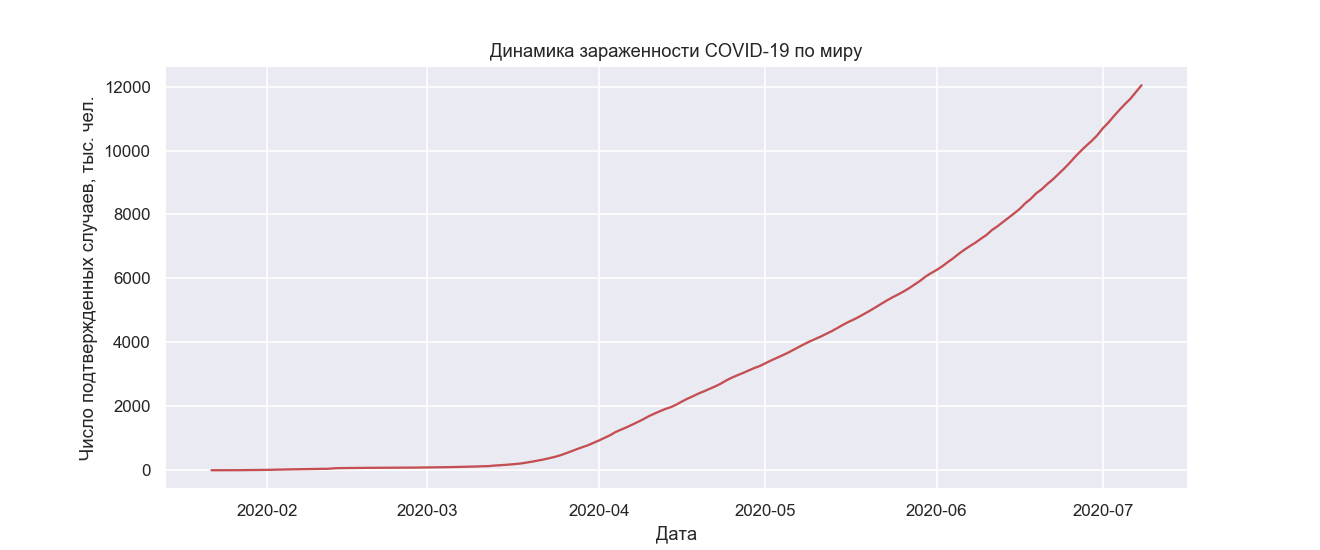

In [131]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

plt.plot(df_by_date["Date_date"],
         df_by_date["Confirmed"]/1000,
         '-r')

plt.title('Динамика зараженности COVID-19 по миру')
plt.xlabel('Дата')
plt.ylabel('Число подтвержденных случаев, тыс. чел.')
plt.show()

## Число умерших и выздоровевших

<IPython.core.display.Javascript object>


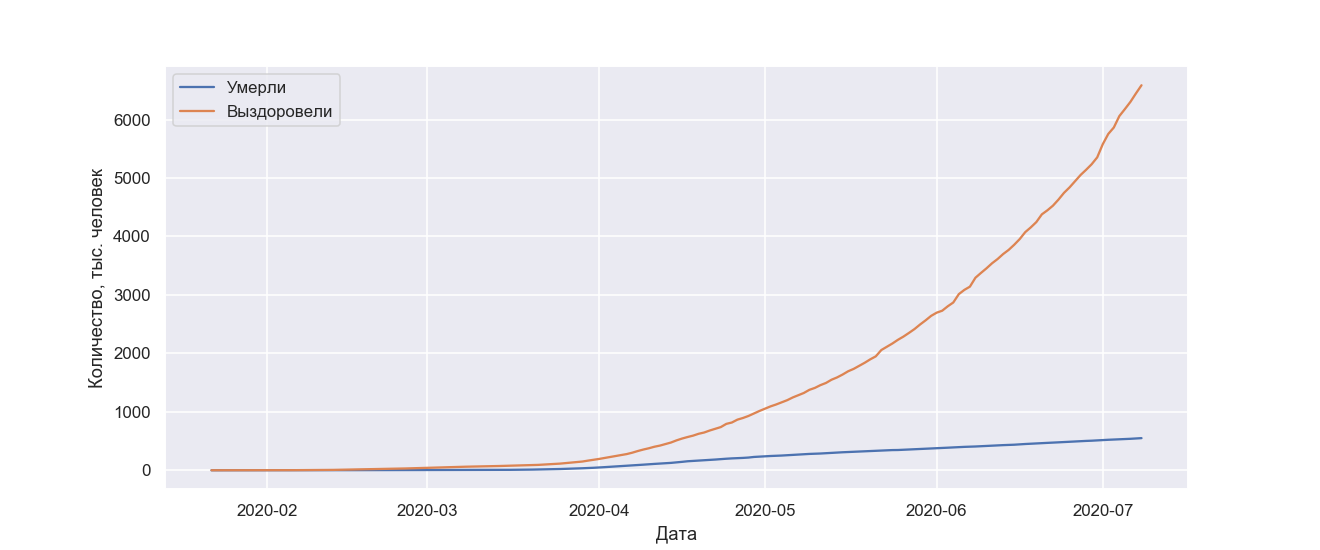

In [132]:
d = {"Deaths":"Умерли", "Recovered":"Выздоровели"}

plt.figure(figsize=[12.0, 5.0], dpi=100)

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])

plt.ylabel('Количество, тыс. человек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Видно, что сейчас наблюдается рост обеих групп с превышением числа выздоровевших пациентов. 

Так как изменение составляет порядки величины, построим данные в полулогарифмическом масштабе.

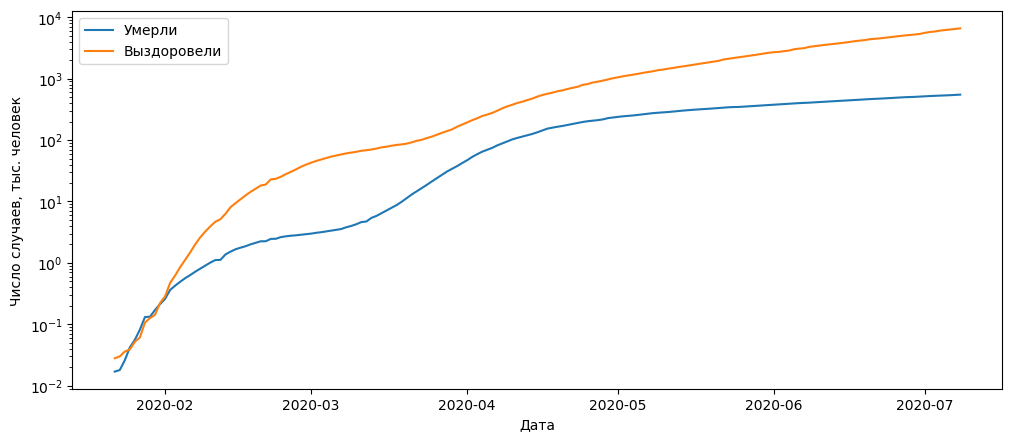

In [19]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

plt.yscale('log')

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])

plt.ylabel('Число случаев, тыс. человек')
plt.xlabel('Дата')
plt.legend()
plt.show()

Можно видеть, что число выздоровевших пациентов начало превышать число умирающих в начале февраля.

## Грубая оценка летальности

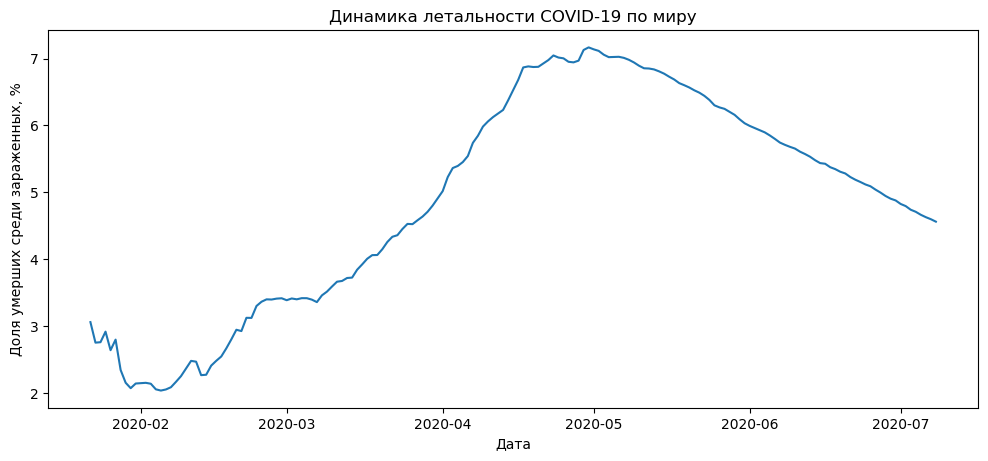

In [20]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

plt.plot(df_by_date["Date_date"],
         df_by_date['Deaths']/df_by_date['Confirmed']*100)

plt.title('Динамика летальности COVID-19 по миру')
plt.ylabel('Доля умерших среди зараженных, %')
plt.xlabel('Дата')
plt.show()

Сравним рассмотренную динамику смертности с динамикой выздоровления.

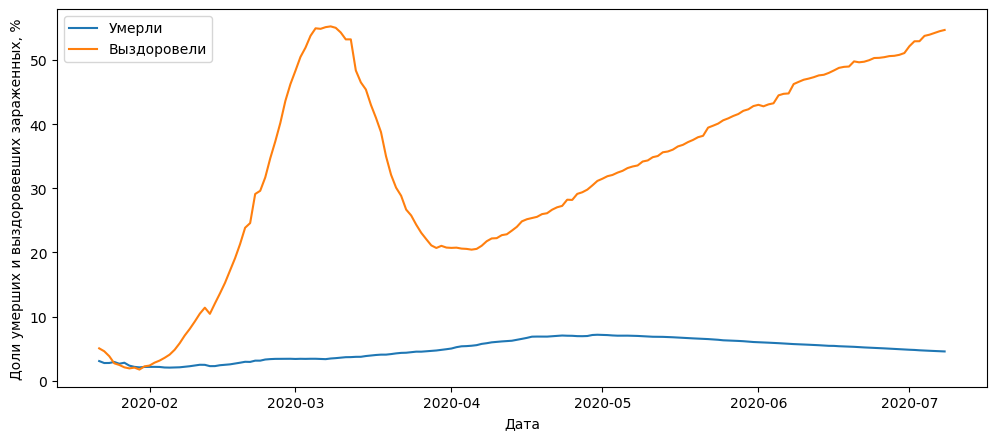

In [21]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/df_by_date['Confirmed']*100,
             label=d[label])

plt.ylabel('Доли умерших и выздоровевших зараженных, %')
plt.xlabel('Дата')
plt.legend()
plt.show()

In [134]:
new_cases = []

for idx in range(len(df_by_date["Confirmed"])):
    if idx == 0:
        new_cases.append(df_by_date["Confirmed"][idx])
    else:
        new_cases.append(df_by_date["Confirmed"][idx] - df_by_date["Confirmed"][idx-1])

<IPython.core.display.Javascript object>


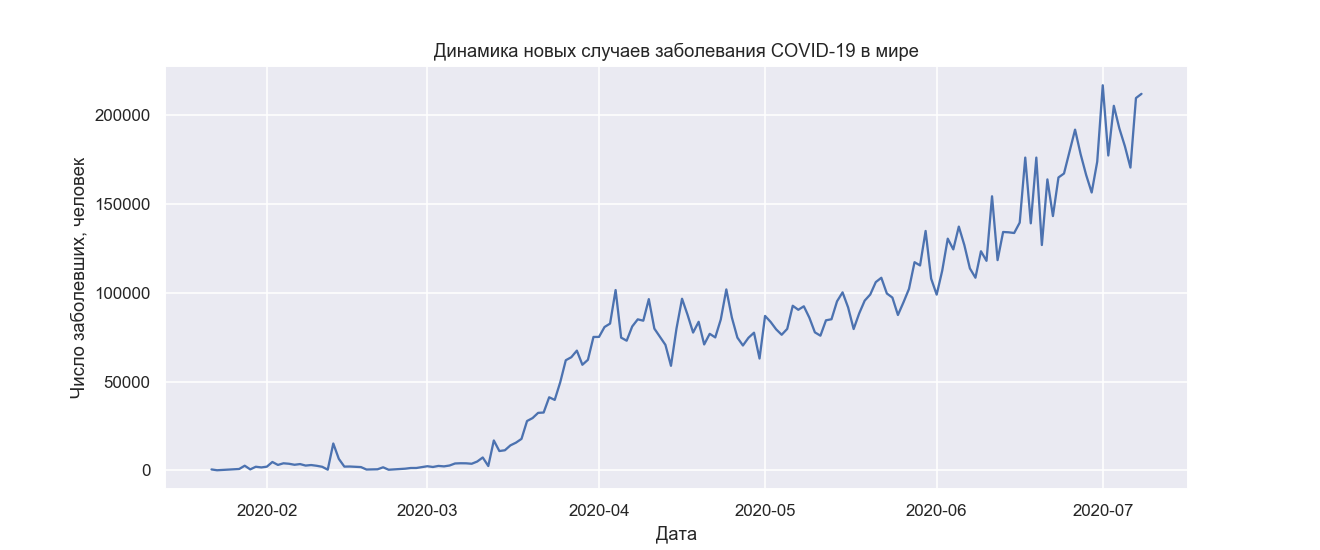

In [135]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

plt.plot(df_by_date["Date_date"],
            new_cases)

plt.title('Динамика новых случаев заболевания COVID-19 в мире')
plt.ylabel('Число заболевших, человек')
plt.xlabel('Дата')
plt.show()

In [136]:
new_cases_data = pd.Series(new_cases, index=pd.to_datetime(df_by_date["Date_date"]))
new_cases_data

Date_date
2020-01-22       555.0
2020-01-23        98.0
2020-01-24       288.0
2020-01-25       497.0
2020-01-26       680.0
                ...   
2020-07-04    192431.0
2020-07-05    182398.0
2020-07-06    170389.0
2020-07-07    209506.0
2020-07-08    211878.0
Length: 169, dtype: float64

In [137]:
resample_data = new_cases_data.resample('W').mean()
resample_data

Date_date
2020-01-26       423.600000
2020-02-02      2095.571429
2020-02-09      3337.714286
2020-02-16      4439.285714
2020-02-23      1108.428571
2020-03-01      1340.857143
2020-03-08      3066.285714
2020-03-15      8230.285714
2020-03-22     24239.285714
2020-03-29     54716.857143
2020-04-05     78853.571429
2020-04-12     82080.714286
2020-04-19     79242.714286
2020-04-26     81442.285714
2020-05-03     76464.857143
2020-05-10     84995.714286
2020-05-17     87417.285714
2020-05-24     99141.857143
2020-05-31    108476.142857
2020-06-07    120519.428571
2020-06-14    127191.714286
2020-06-21    150658.857143
2020-06-28    170036.428571
2020-07-05    186273.714286
2020-07-12    197257.666667
Freq: W-SUN, dtype: float64

<IPython.core.display.Javascript object>


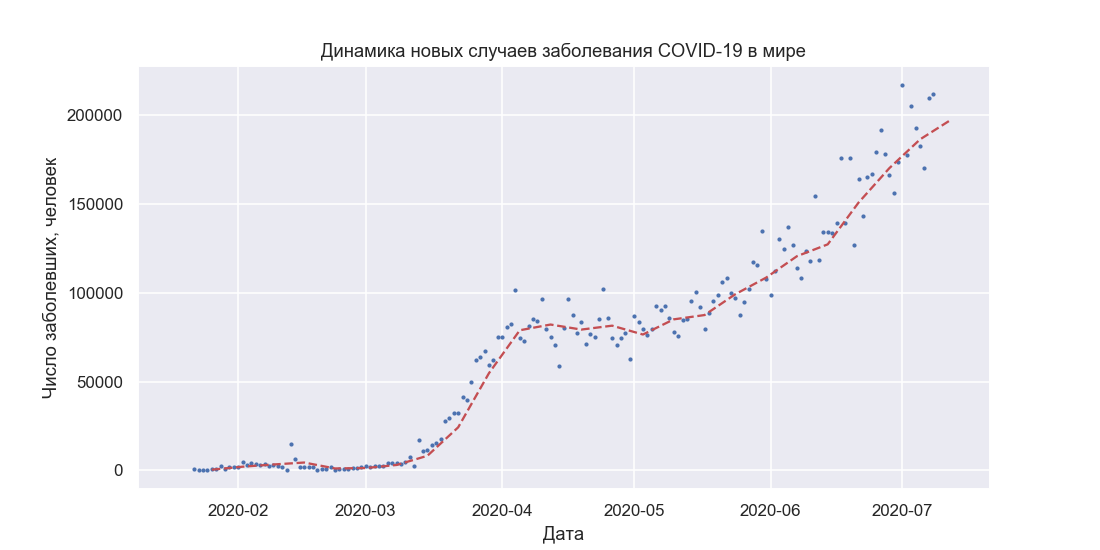

In [138]:
import seaborn; seaborn.set()

%matplotlib notebook

plt.figure(figsize=[10.0, 5.0], dpi=100)

plt.scatter(new_cases_data.index,
            new_cases_data.values, s=3)
# plt.plot(new_cases_data.index,
#             new_cases_data.values)

plt.plot(resample_data.index, resample_data.values, '--r')

plt.title('Динамика новых случаев заболевания COVID-19 в мире')
plt.ylabel('Число заболевших, человек')
plt.xlabel('Дата')
plt.show()

## Визуализация данных по странам

In [139]:
def new_cases_parser(data_cdr):
    new_cases = []

    for idx in range(len(data_cdr["Confirmed"])):
        if idx == 0:
            new_cases.append(data_cdr["Confirmed"][idx])
        else:
            new_cases.append(data_cdr["Confirmed"][idx] - data_cdr["Confirmed"][idx-1])
    return new_cases

In [140]:
def new_cases_plotter(data_cdr, data_new_cases, country):
    plt.figure(figsize=[10.0, 5.0], dpi=100)

    plt.plot(data_cdr.index,
             data_new_cases)

    plt.title(f'Динамика новых случаев заболевания COVID-19 в {country}')
    plt.ylabel('Число заболевших, человек')
    plt.xlabel('Дата')
    plt.show()

In [141]:
def new_cases_visualizator(data, country):
    d = data[data['Country/Region'] == country]
    d_cdr = d.groupby('Date_date')[['Confirmed', 'Deaths', 'Recovered']].sum()

    new_cases = new_cases_parser(d_cdr)
    new_cases_plotter(d_cdr, new_cases, country)

<IPython.core.display.Javascript object>


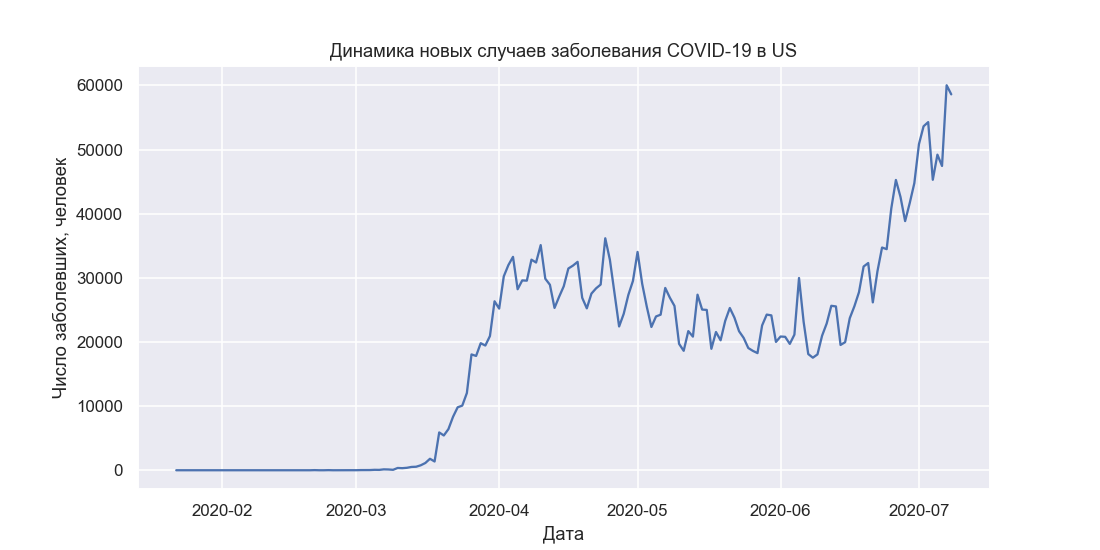

In [142]:
new_cases_visualizator(data, 'US')

<IPython.core.display.Javascript object>


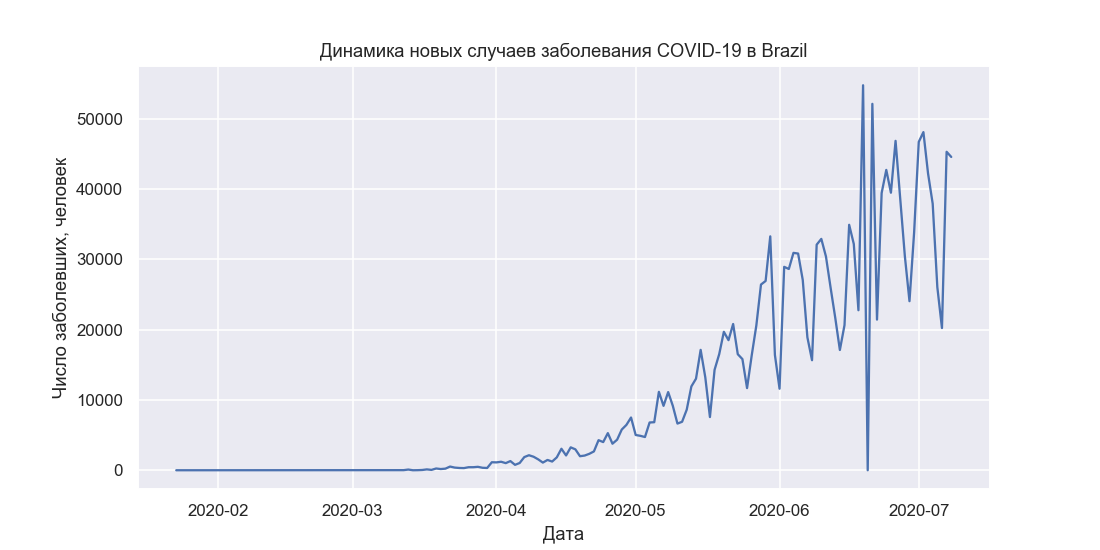

In [143]:
new_cases_visualizator(data, 'Brazil')

<IPython.core.display.Javascript object>


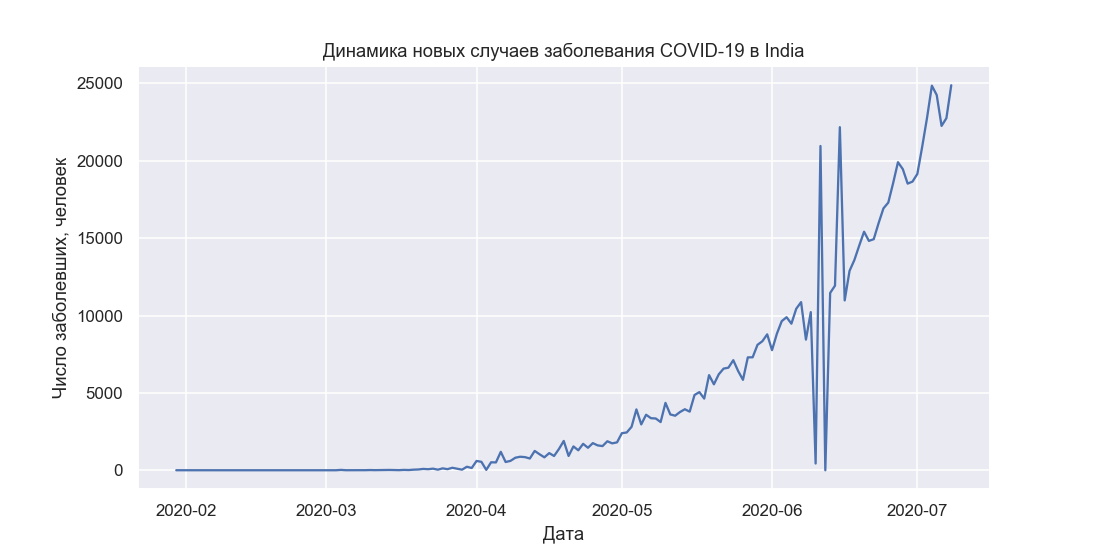

In [144]:
new_cases_visualizator(data, 'India')

<IPython.core.display.Javascript object>


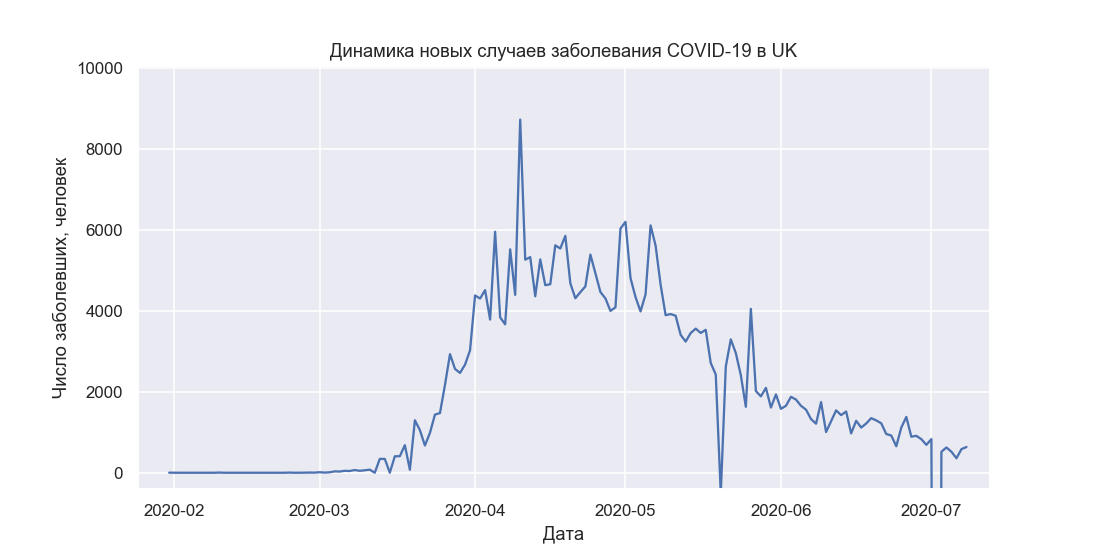

In [145]:
new_cases_visualizator(data, 'UK')

<IPython.core.display.Javascript object>


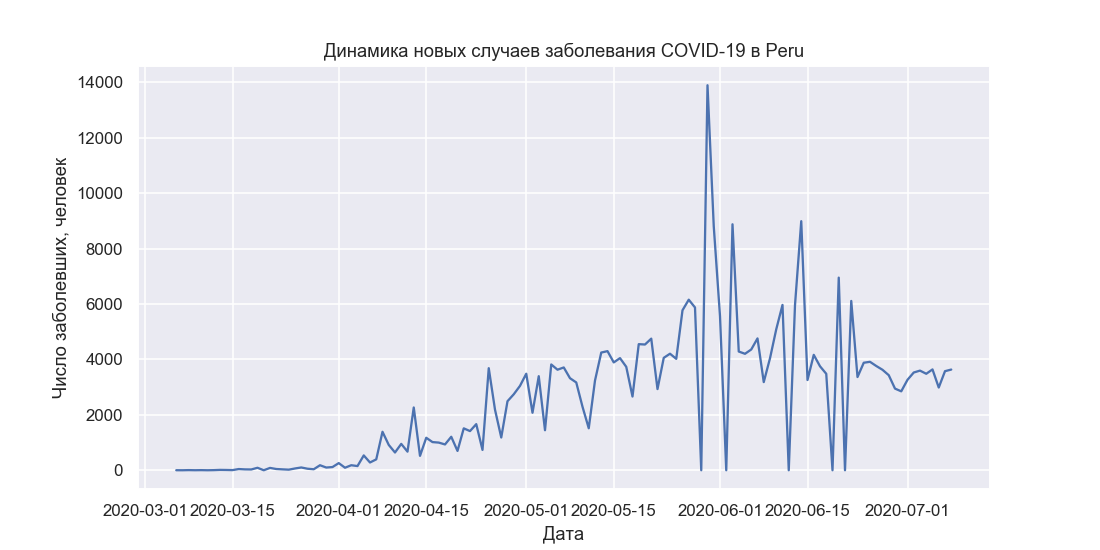

In [146]:
new_cases_visualizator(data, 'Peru')

<IPython.core.display.Javascript object>


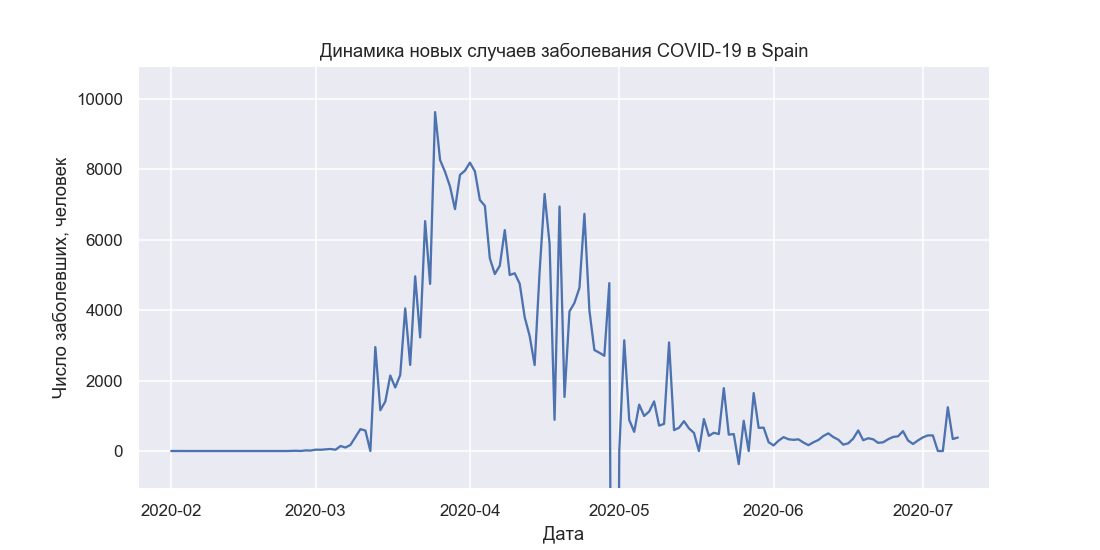

In [147]:
new_cases_visualizator(data, 'Spain')

<IPython.core.display.Javascript object>


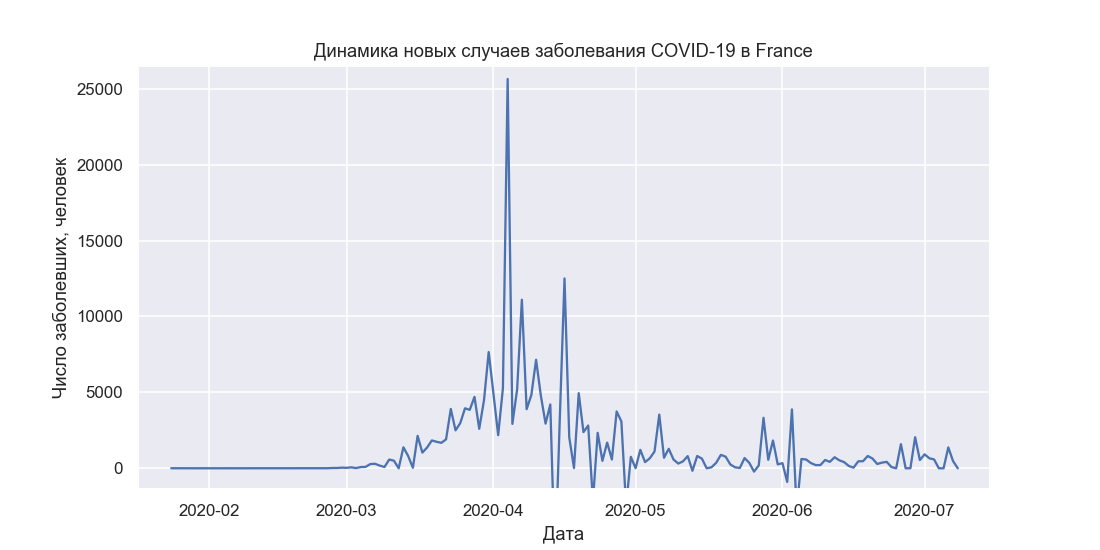

In [148]:
new_cases_visualizator(data, 'France')

<IPython.core.display.Javascript object>


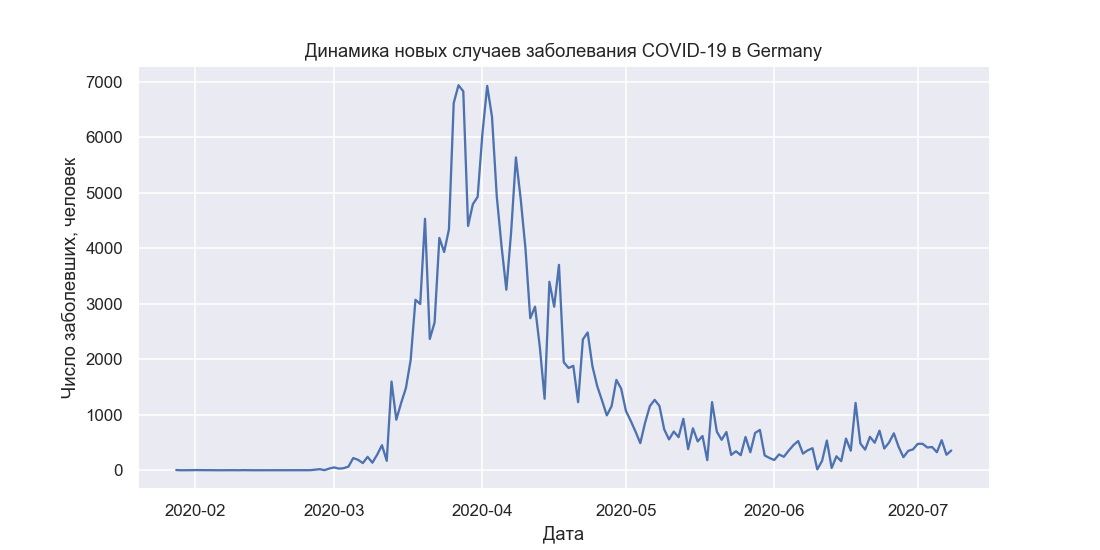

In [149]:
new_cases_visualizator(data, 'Germany')

<IPython.core.display.Javascript object>


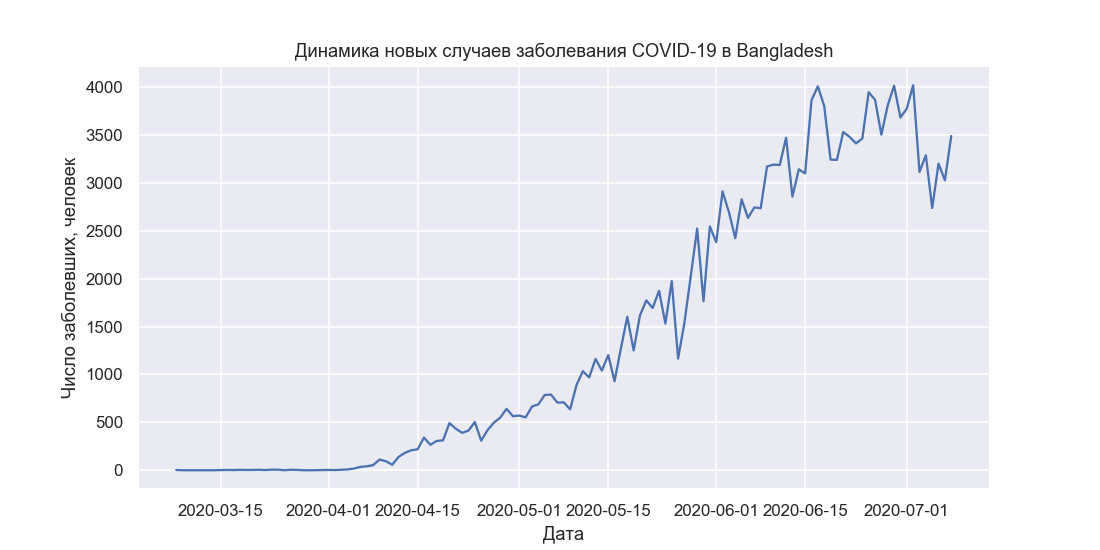

In [150]:
new_cases_visualizator(data, 'Bangladesh')

<IPython.core.display.Javascript object>


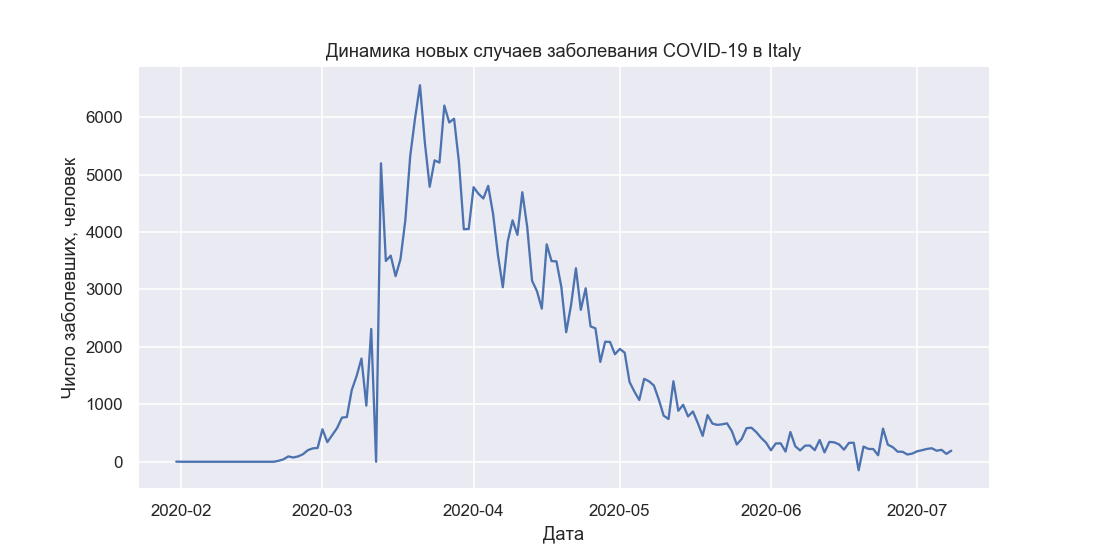

In [151]:
new_cases_visualizator(data, 'Italy')

<IPython.core.display.Javascript object>


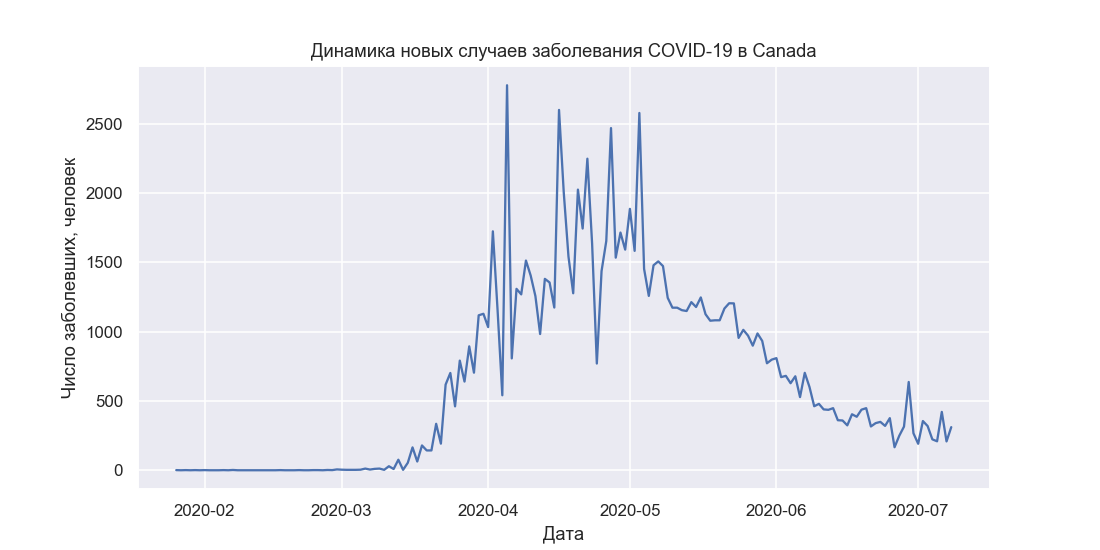

In [152]:
new_cases_visualizator(data, 'Canada')

<IPython.core.display.Javascript object>


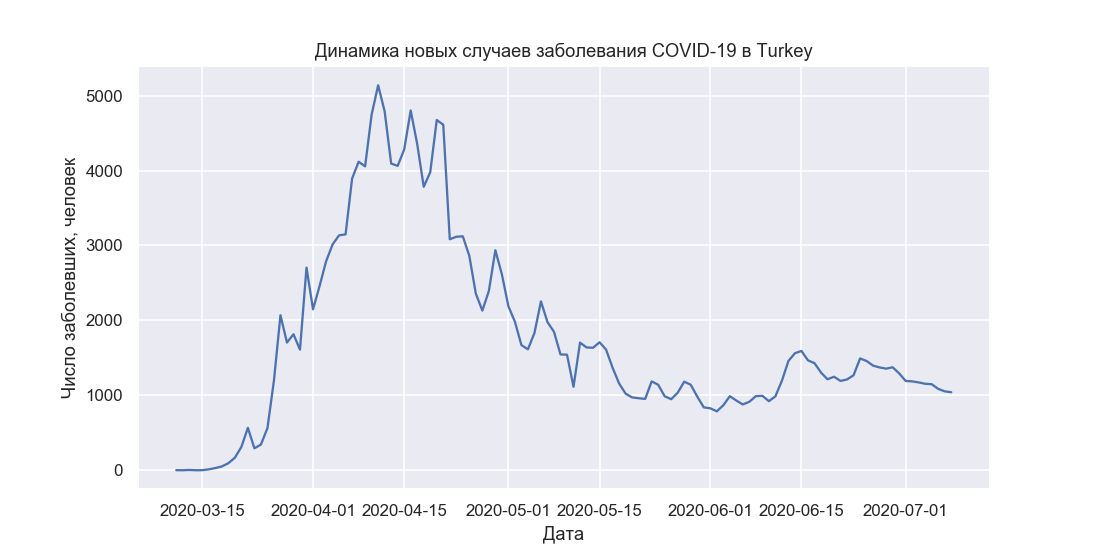

In [153]:
new_cases_visualizator(data, 'Turkey')

## Визуализация данных по России

In [27]:
d_russia = data[data['Country/Region'] == 'Russia']
d_russia[-1:-15:-1] #.head()

ObservationDate                  Province/State Country/Region  \
59753      2020-07-08                Zabaykalsky Krai         Russia   
59749      2020-07-08                Yaroslavl Oblast         Russia   
59747      2020-07-08  Yamalo-Nenets Autonomous Okrug         Russia   
59735      2020-07-08                 Voronezh Oblast         Russia   
59733      2020-07-08                  Vologda Oblast         Russia   
59732      2020-07-08                Volgograd Oblast         Russia   
59731      2020-07-08                 Vladimir Oblast         Russia   
59700      2020-07-08                Ulyanovsk Oblast         Russia   
59699      2020-07-08                 Udmurt Republic         Russia   
59697      2020-07-08                   Tyva Republic         Russia   
59696      2020-07-08                   Tyumen Oblast         Russia   
59695      2020-07-08                     Tver Oblast         Russia   
59692      2020-07-08                     Tula Oblast         Russia   
59687      2020-07-08                    Tomsk Oblast         Russia   

       Confirmed  Deaths  Recovered   Date_date  
59753     3480.0    44.0     2503.0  2020-07-08  
59749     5106.0    22.0     4041.0  2020-07-08  
59747     7143.0    47.0     2757.0  2020-07-08  
59735     8778.0    51.0     5665.0  2020-07-08  
59733     1770.0    17.0     1409.0  2020-07-08  
59732     7058.0    45.0     3564.0  2020-07-08  
59731     4739.0    81.0     3380.0  2020-07-08  
59700     6628.0    49.0     3798.0  2020-07-08  
59699     1592.0    17.0     1252.0  2020-07-08  
59697     5226.0    25.0     1973.0  2020-07-08  
59696     3713.0    18.0     2251.0  2020-07-08  
59695     3941.0    88.0     3005.0  2020-07-08  
59692     7248.0   137.0     6005.0  2020-07-08  
59687     2717.0    21.0     1512.0  2020-07-08

In [28]:
d_russia_cdr = d_russia.groupby('Date_date')[['Confirmed', 'Deaths', 'Recovered']].sum()
d_russia_cdr

Confirmed   Deaths  Recovered
Date_date                                
2020-01-31        2.0      0.0        0.0
2020-02-01        2.0      0.0        0.0
2020-02-02        2.0      0.0        0.0
2020-02-03        2.0      0.0        0.0
2020-02-04        2.0      0.0        0.0
...               ...      ...        ...
2020-07-04   673564.0  10011.0   446127.0
2020-07-05   680283.0  10145.0   449995.0
2020-07-06   686852.0  10280.0   453570.0
2020-07-07   693215.0  10478.0   463103.0
2020-07-08   699749.0  10650.0   471718.0

[160 rows x 3 columns]

<IPython.core.display.Javascript object>


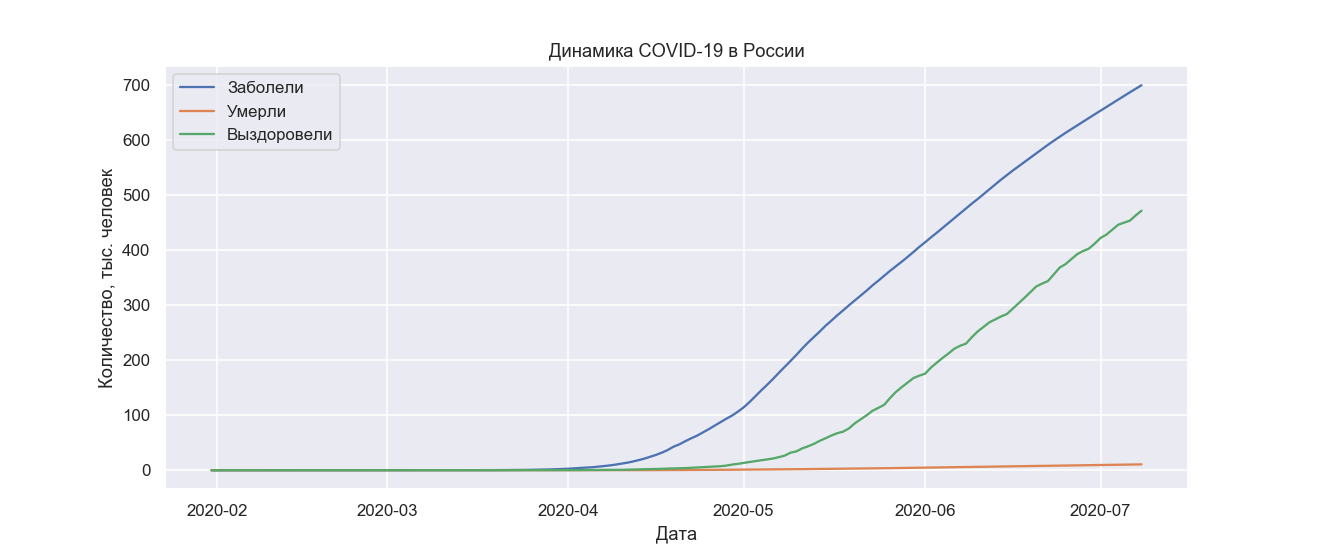

In [29]:
d = {"Confirmed":"Заболели", "Deaths":"Умерли", "Recovered":"Выздоровели"}

plt.figure(figsize=[12.0, 5.0], dpi=100)

for label in d:
    plt.plot(d_russia_cdr.index,
             d_russia_cdr[label]/1000,
             label=d[label])

plt.title('Динамика COVID-19 в России')
plt.ylabel('Количество, тыс. человек')
plt.xlabel('Дата')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


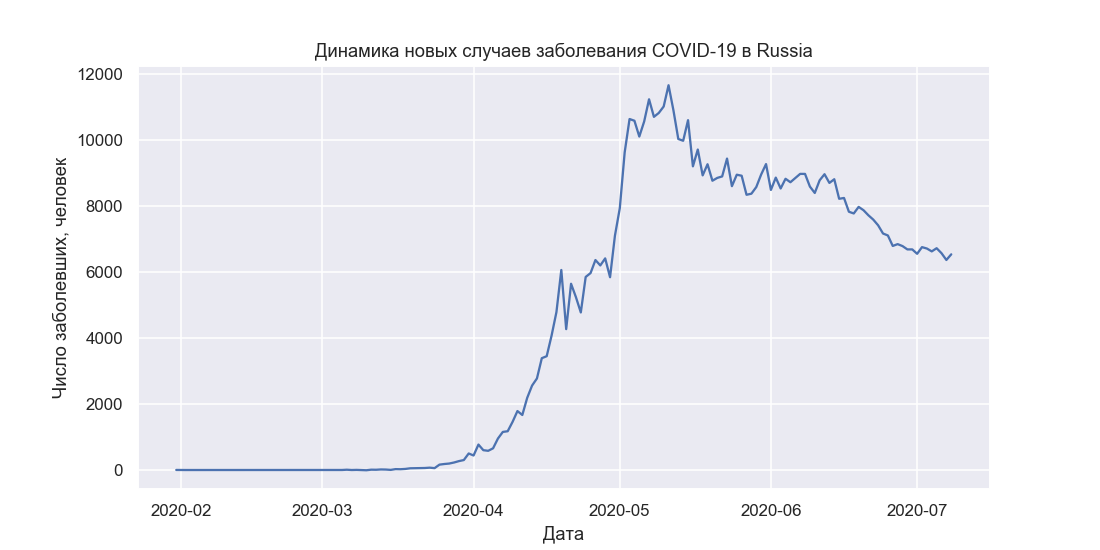

In [154]:
new_cases_visualizator(data, 'Russia')

In [32]:
d_russia.loc[:, 'Province/State'].unique()

array([nan, 'Adygea Republic', 'Altai Krai', 'Altai Republic',
       'Amur Oblast', 'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Bashkortostan Republic', 'Belgorod Oblast', 'Bryansk Oblast',
       'Buryatia Republic', 'Chechen Republic', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Chuvashia Republic',
       'Dagestan Republic', 'Ingushetia Republic', 'Irkutsk Oblast',
       'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic',
       'Kemerovo Oblast', 'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Mordovia Republic', 'Moscow', 'Moscow 

In [33]:
d_ykt = d_russia[d_russia['Province/State'] == 'Sakha (Yakutiya) Republic']
d_ykt

ObservationDate             Province/State Country/Region  Confirmed  \
33096      2020-06-01  Sakha (Yakutiya) Republic         Russia     2042.0   
33759      2020-06-02  Sakha (Yakutiya) Republic         Russia     2116.0   
34423      2020-06-03  Sakha (Yakutiya) Republic         Russia     2214.0   
35087      2020-06-04  Sakha (Yakutiya) Republic         Russia     2308.0   
35762      2020-06-05  Sakha (Yakutiya) Republic         Russia     2380.0   
36446      2020-06-06  Sakha (Yakutiya) Republic         Russia     2453.0   
37130      2020-06-07  Sakha (Yakutiya) Republic         Russia     2531.0   
37815      2020-06-08  Sakha (Yakutiya) Republic         Russia     2611.0   
38499      2020-06-09  Sakha (Yakutiya) Republic         Russia     2686.0   
39215      2020-06-10  Sakha (Yakutiya) Republic         Russia     2753.0   
39941      2020-06-11  Sakha (Yakutiya) Republic         Russia     2822.0   
40670      2020-06-12  Sakha (Yakutiya) Republic         Russia     2898.0   
41399      2020-06-13  Sakha (Yakutiya) Republic         Russia     2968.0   
42128      2020-06-14  Sakha (Yakutiya) Republic         Russia     3037.0   
42857      2020-06-15  Sakha (Yakutiya) Republic         Russia     3122.0   
43586      2020-06-16  Sakha (Yakutiya) Republic         Russia     3199.0   
44315      2020-06-17  Sakha (Yakutiya) Republic         Russia     3290.0   
45044      2020-06-18  Sakha (Yakutiya) Republic         Russia     3389.0   
45773      2020-06-19  Sakha (Yakutiya) Republic         Russia     3486.0   
46502      2020-06-20  Sakha (Yakutiya) Republic         Russia     3570.0   
47231      2020-06-21  Sakha (Yakutiya) Republic         Russia     3657.0   
47960      2020-06-22  Sakha (Yakutiya) Republic         Russia     3742.0   
48689      2020-06-23  Sakha (Yakutiya) Republic         Russia     3817.0   
49418      2020-06-24  Sakha (Yakutiya) Republic         Russia     3891.0   
50147      2020-06-25  Sakha (Yakutiya) Republic         Russia     3963.0   
50876      2020-06-26  Sakha (Yakutiya) Republic         Russia     4013.0   
51605      2020-06-27  Sakha (Yakutiya) Republic         Russia     4075.0   
52334      2020-06-28  Sakha (Yakutiya) Republic         Russia     4128.0   
53063      2020-06-29  Sakha (Yakutiya) Republic         Russia     4178.0   
53792      2020-06-30  Sakha (Yakutiya) Republic         Russia     4223.0   
54521      2020-07-01  Sakha (Yakutiya) Republic         Russia     4267.0   
55250      2020-07-02  Sakha (Yakutiya) Republic         Russia     4315.0   
55979      2020-07-03  Sakha (Yakutiya) Republic         Russia     4365.0   
56708      2020-07-04  Sakha (Yakutiya) Republic         Russia     4422.0   
57437      2020-07-05  Sakha (Yakutiya) Republic         Russia     4467.0   
58166      2020-07-06  Sakha (Yakutiya) Republic         Russia     4504.0   
58895      2020-07-07  Sakha (Yakutiya) Republic         Russia     4550.0   
59624      2020-07-08  Sakha (Yakutiya) Republic         Russia     4598.0   

       Deaths  Recovered   Date_date  
33096     8.0      903.0  2020-06-01  
33759     8.0      943.0  2020-06-02  
34423     9.0     1015.0  2020-06-03  
35087    11.0     1071.0  2020-06-04  
35762    14.0     1177.0  2020-06-05  
36446    15.0     1242.0  2020-06-06  
37130    15.0     1311.0  2020-06-07  
37815    15.0     1343.0  2020-06-08  
38499    15.0     1428.0  2020-06-09  
39215    19.0     1560.0  2020-06-10  
39941    20.0     1634.0  2020-06-11  
40670    20.0     1751.0  2020-06-12  
41399    20.0     1826.0  2020-06-13  
42128    20.0     1862.0  2020-06-14  
42857    23.0     1899.0  2020-06-15  
43586    23.0     2028.0  2020-06-16  
44315    23.0     2148.0  2020-06-17  
45044    23.0     2252.0  2020-06-18  
45773    23.0     2328.0  2020-06-19  
46502    23.0     2416.0  2020-06-20  
47231    23.0     2452.0  2020-06-21  
47960    24.0     2526.0  2020-06-22  
48689    24.0     2587.0  2020-06-23  
49418    24.0     2689.0  2

In [34]:
d_ykt_cdr = d_ykt.groupby('Date_date')[['Confirmed', 'Deaths', 'Recovered']].sum()
d_ykt_cdr

Confirmed  Deaths  Recovered
Date_date                               
2020-06-01     2042.0     8.0      903.0
2020-06-02     2116.0     8.0      943.0
2020-06-03     2214.0     9.0     1015.0
2020-06-04     2308.0    11.0     1071.0
2020-06-05     2380.0    14.0     1177.0
2020-06-06     2453.0    15.0     1242.0
2020-06-07     2531.0    15.0     1311.0
2020-06-08     2611.0    15.0     1343.0
2020-06-09     2686.0    15.0     1428.0
2020-06-10     2753.0    19.0     1560.0
2020-06-11     2822.0    20.0     1634.0
2020-06-12     2898.0    20.0     1751.0
2020-06-13     2968.0    20.0     1826.0
2020-06-14     3037.0    20.0     1862.0
2020-06-15     3122.0    23.0     1899.0
2020-06-16     3199.0    23.0     2028.0
2020-06-17     3290.0    23.0     2148.0
2020-06-18     3389.0    23.0     2252.0
2020-06-19     3486.0    23.0     2328.0
2020-06-20     3570.0    23.0     2416.0
2020-06-21     3657.0    23.0     2452.0
2020-06-22     3742.0    24.0     2526.0
2020-06-23     3817.0    24.0     2587.0
2020-06-24     3891.0    24.0     2689.0
2020-06-25     3963.0    25.0     2757.0
2020-06-26     4013.0    27.0     2802.0
2020-06-27     4075.0    28.0     2844.0
2020-06-28     4128.0    28.0     2861.0
2020-06-29     4178.0    29.0     2866.0
2020-06-30     4223.0    30.0     2961.0
2020-07-01     4267.0    32.0     3033.0
2020-07-02     4315.0    32.0     3084.0
2020-07-03     4365.0    32.0     3247.0
2020-07-04     4422.0    32.0     3333.0
2020-07-05     4467.0    32.0     3393.0
2020-07-06     4504.0    32.0     3473.0
2020-07-07     4550.0    34.0     3626.0
2020-07-08     4598.0    34.0     3730.0

<IPython.core.display.Javascript object>


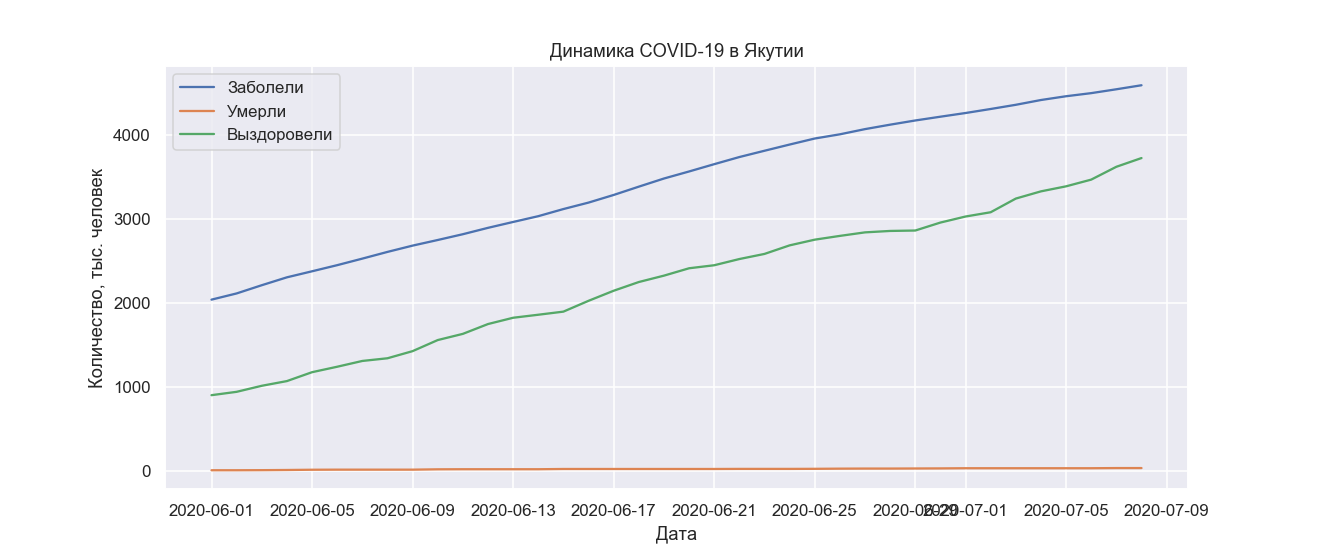

In [35]:
plt.figure(figsize=[12.0, 5.0], dpi=100)

for label in d:
    plt.plot(d_ykt_cdr.index,
             d_ykt_cdr[label],
             label=d[label])

plt.title('Динамика COVID-19 в Якутии')
plt.ylabel(f'Количество, тыс. человек')
plt.xlabel('Дата')
plt.legend()
plt.show()

In [155]:
def new_cases_parser_for_russia(data_cdr):
    new_cases = []

    for idx in range(len(data_cdr["Confirmed"])):
        if idx > 0:
            new_cases.append(data_cdr["Confirmed"][idx] - data_cdr["Confirmed"][idx-1])
            
    return new_cases

In [184]:
def new_cases_plotter_for_russia(data_cdr, data_new_cases, country):
    plt.figure(figsize=[12.0, 6.0], dpi=100)

    plt.plot(data_cdr.index[1:],
             data_new_cases,
             label="Заболели")

    plt.title(f'Динамика новых случаев заболевания COVID-19 в {country}')
    plt.ylabel('Число заболевших, человек')
    plt.xlabel('Дата')
    plt.legend()
    plt.show()

In [157]:
def new_cases_visualizator_for_russia(data, region):
    d = data[data['Province/State'] == region]
    d_cdr = d.groupby('Date_date')[['Confirmed', 'Deaths', 'Recovered']].sum()

    new_cases = new_cases_parser_for_russia(d_cdr)
    new_cases_plotter_for_russia(d_cdr, new_cases, region)

<IPython.core.display.Javascript object>


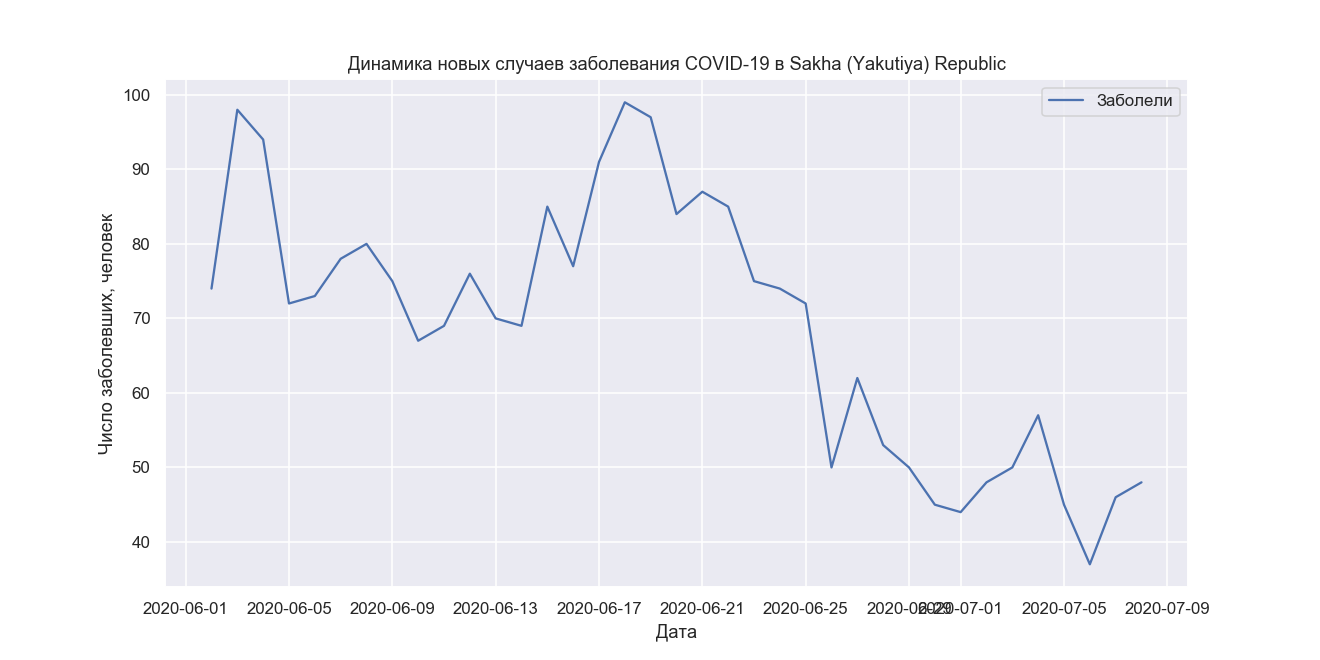

In [185]:
new_cases_visualizator_for_russia(d_russia, 'Sakha (Yakutiya) Republic')

<IPython.core.display.Javascript object>


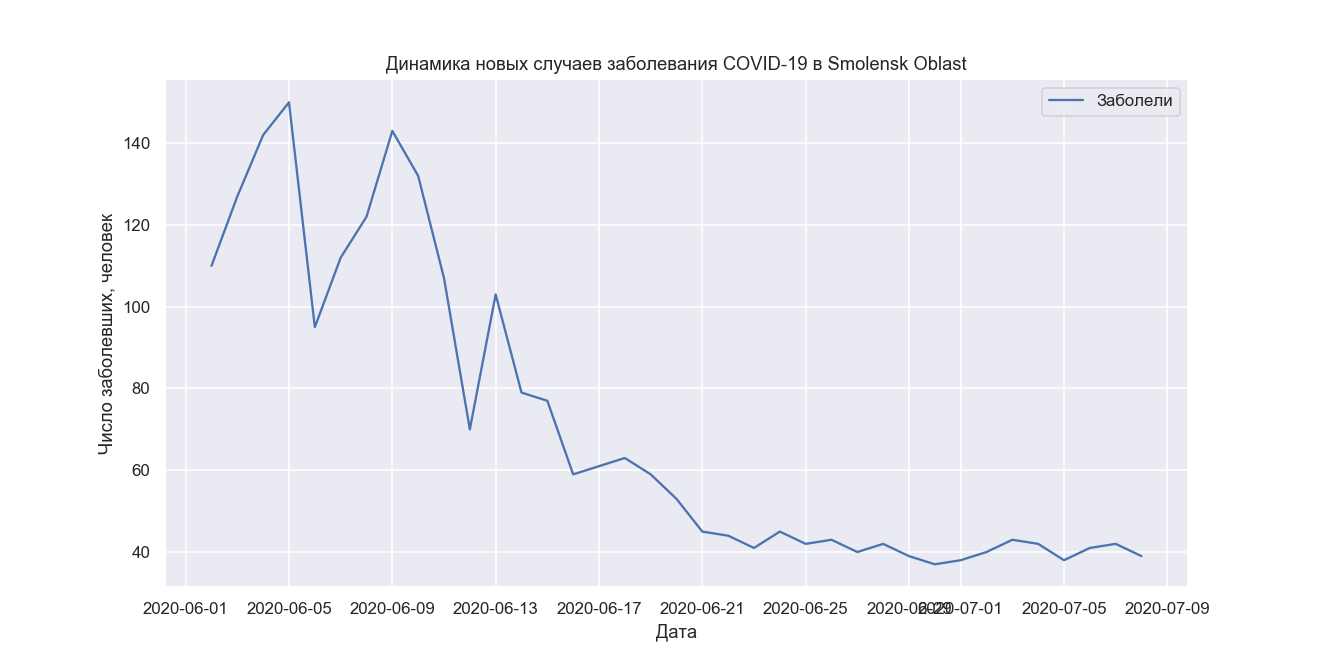

In [186]:
new_cases_visualizator_for_russia(d_russia, 'Smolensk Oblast')

<IPython.core.display.Javascript object>


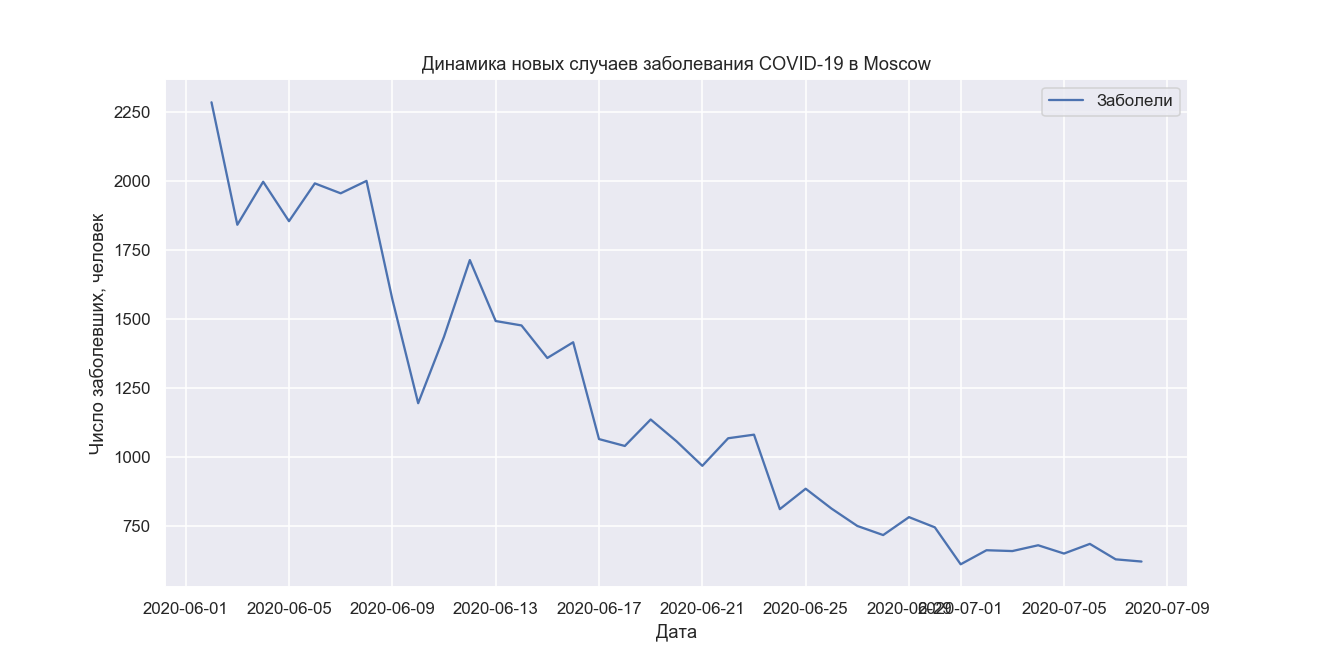

In [187]:
new_cases_visualizator_for_russia(d_russia, 'Moscow')

<IPython.core.display.Javascript object>


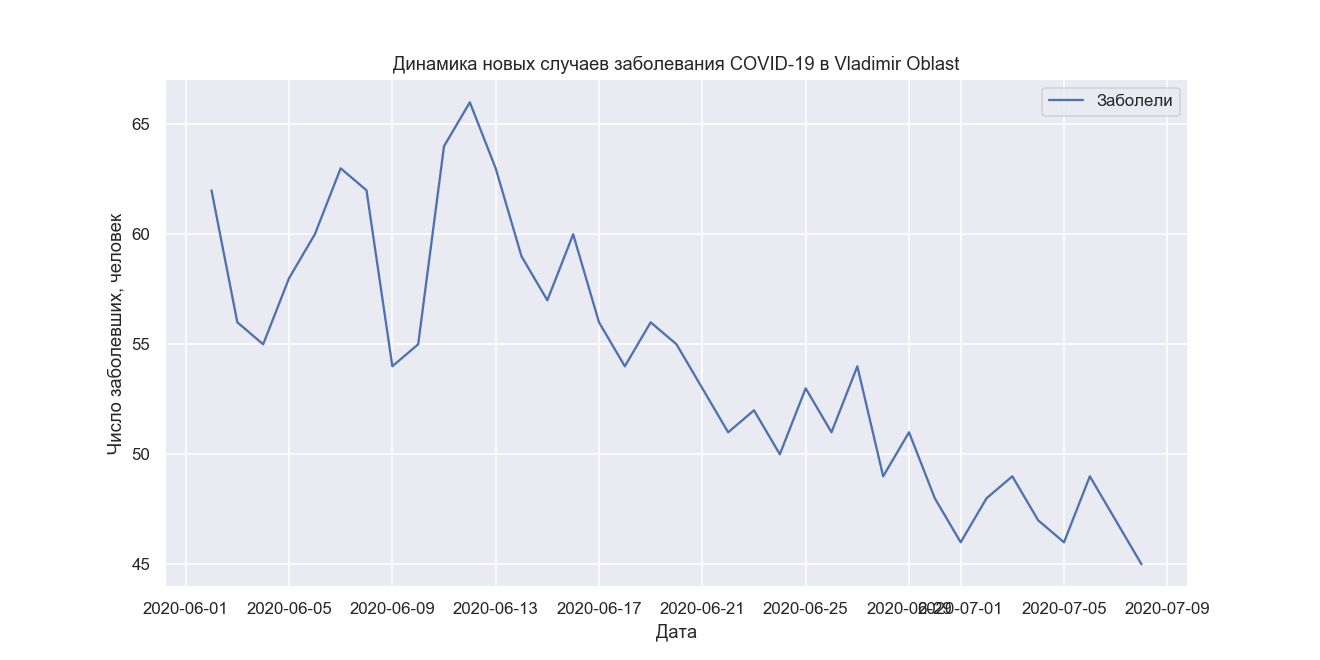

In [188]:
new_cases_visualizator_for_russia(d_russia, 'Vladimir Oblast')

<IPython.core.display.Javascript object>


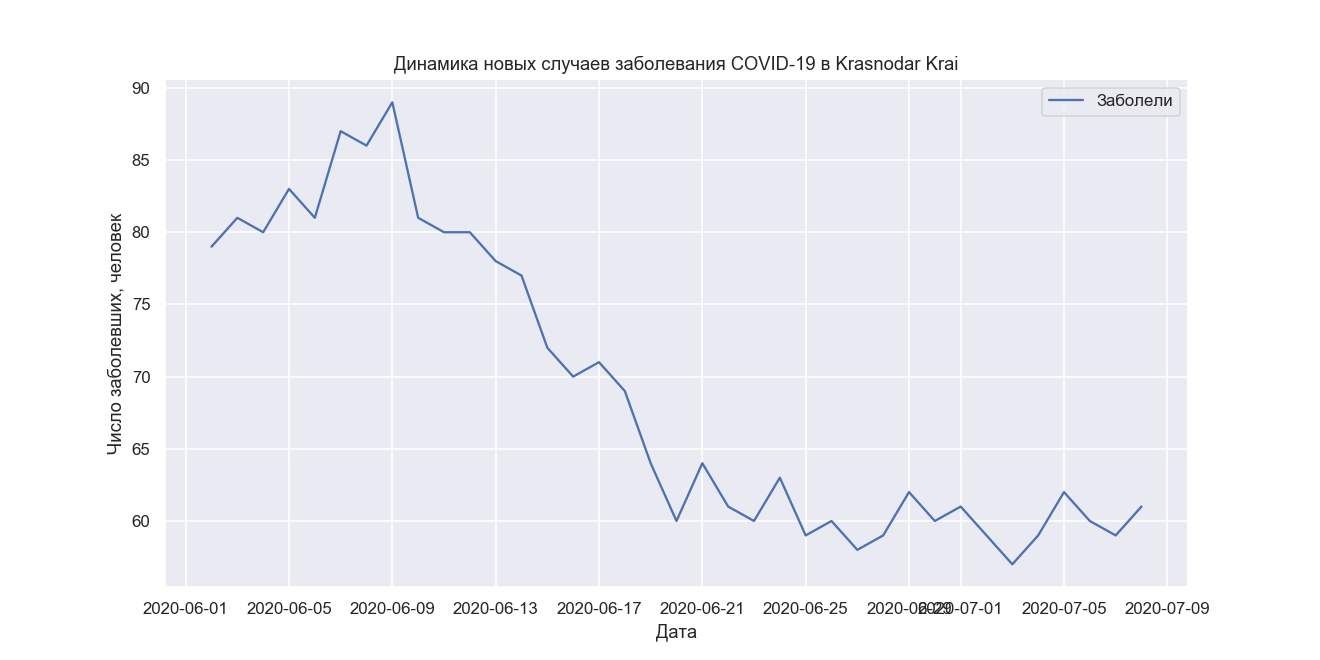

In [189]:
new_cases_visualizator_for_russia(d_russia, 'Krasnodar Krai')

<IPython.core.display.Javascript object>


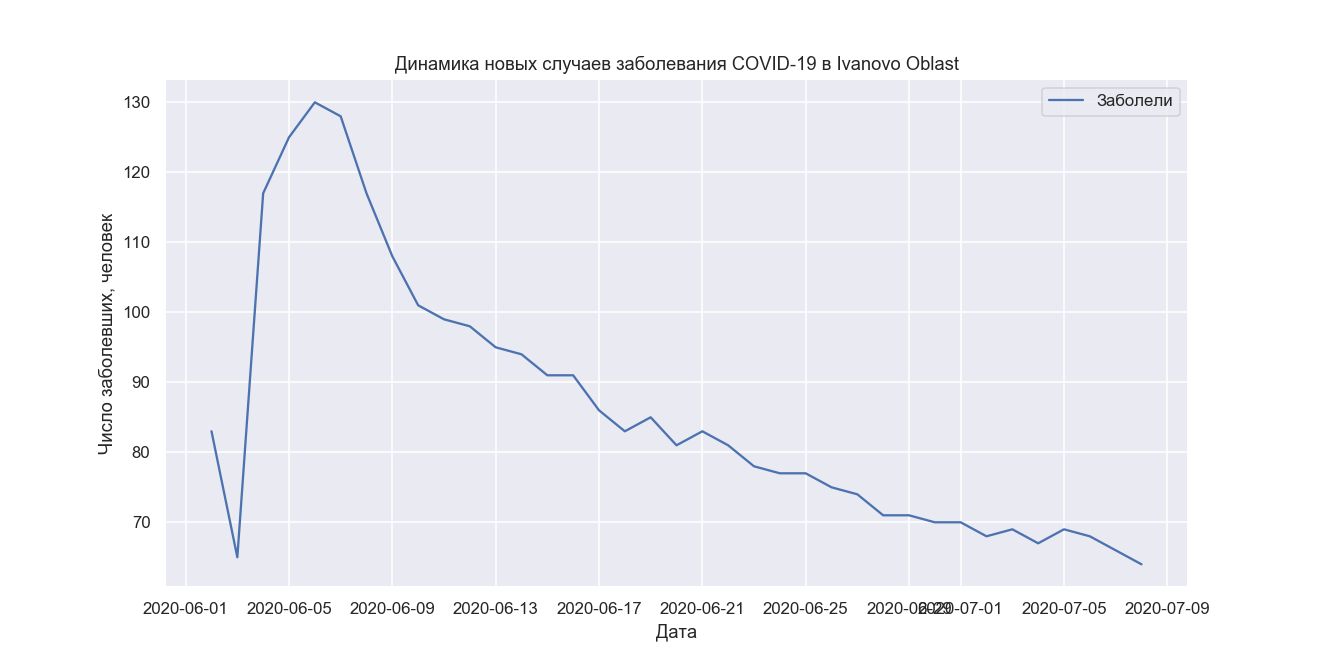

In [190]:
new_cases_visualizator_for_russia(d_russia, 'Ivanovo Oblast')

<IPython.core.display.Javascript object>


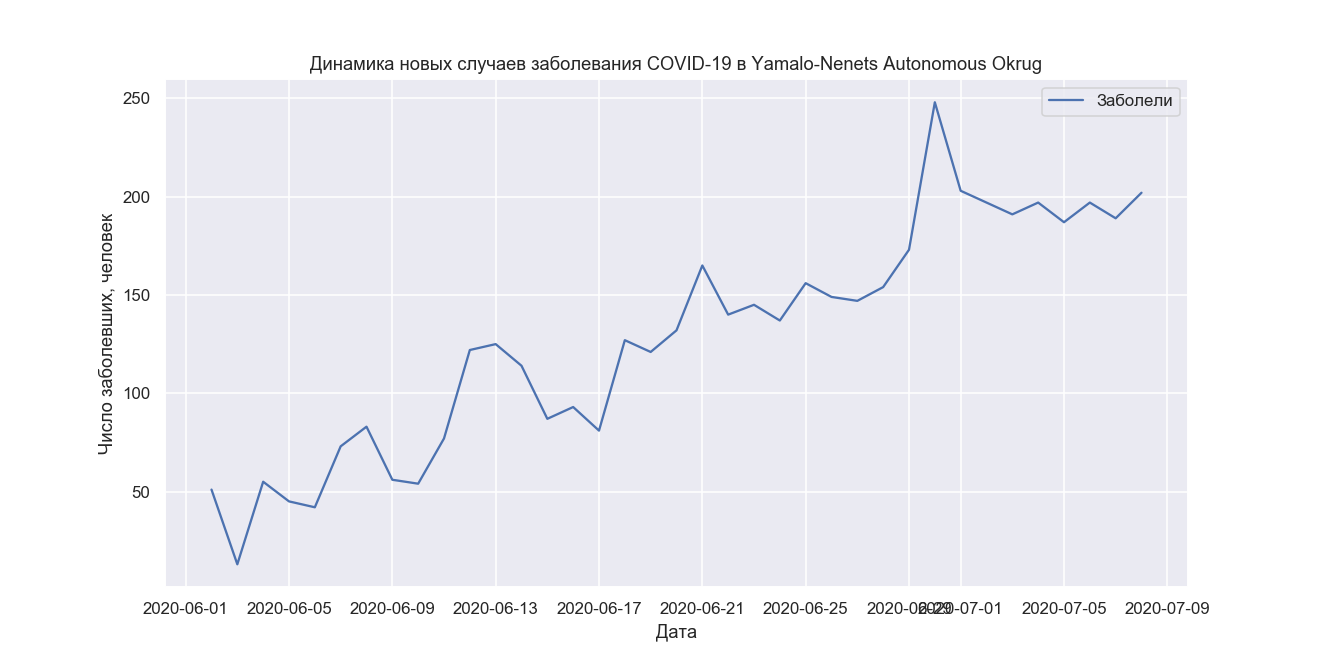

In [192]:
new_cases_visualizator_for_russia(d_russia, 'Yamalo-Nenets Autonomous Okrug')

<IPython.core.display.Javascript object>


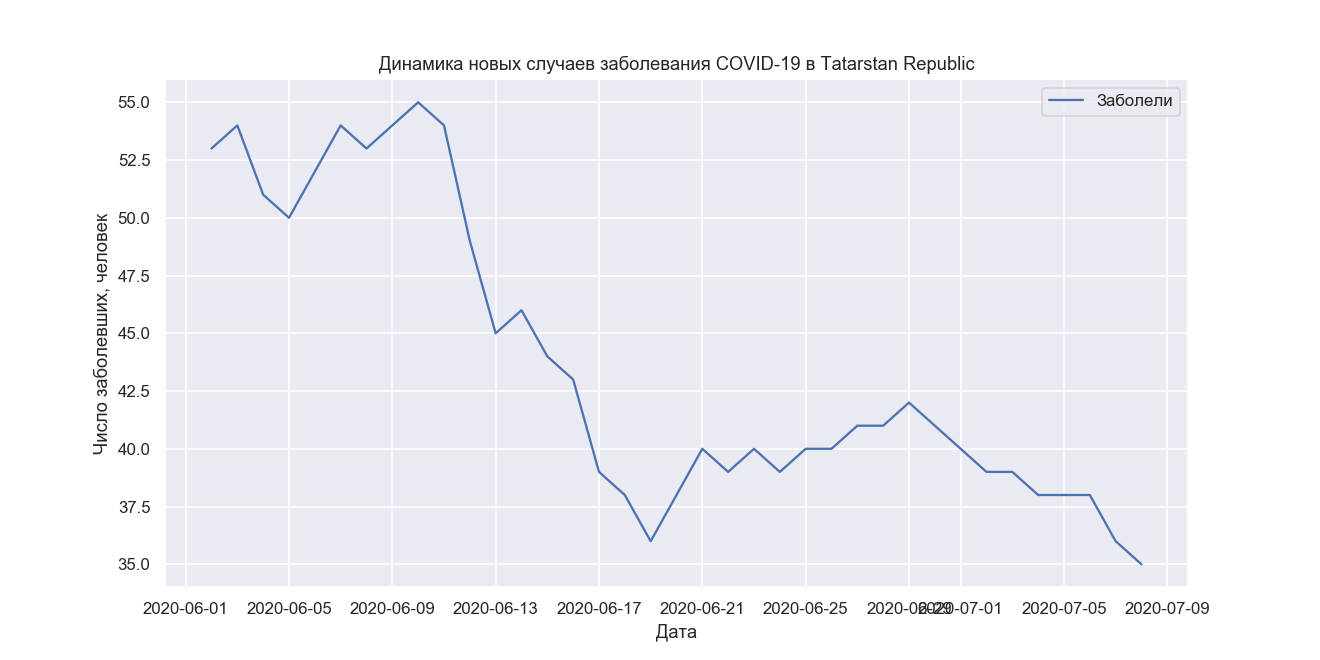

In [193]:
new_cases_visualizator_for_russia(d_russia, 'Tatarstan Republic')

<IPython.core.display.Javascript object>


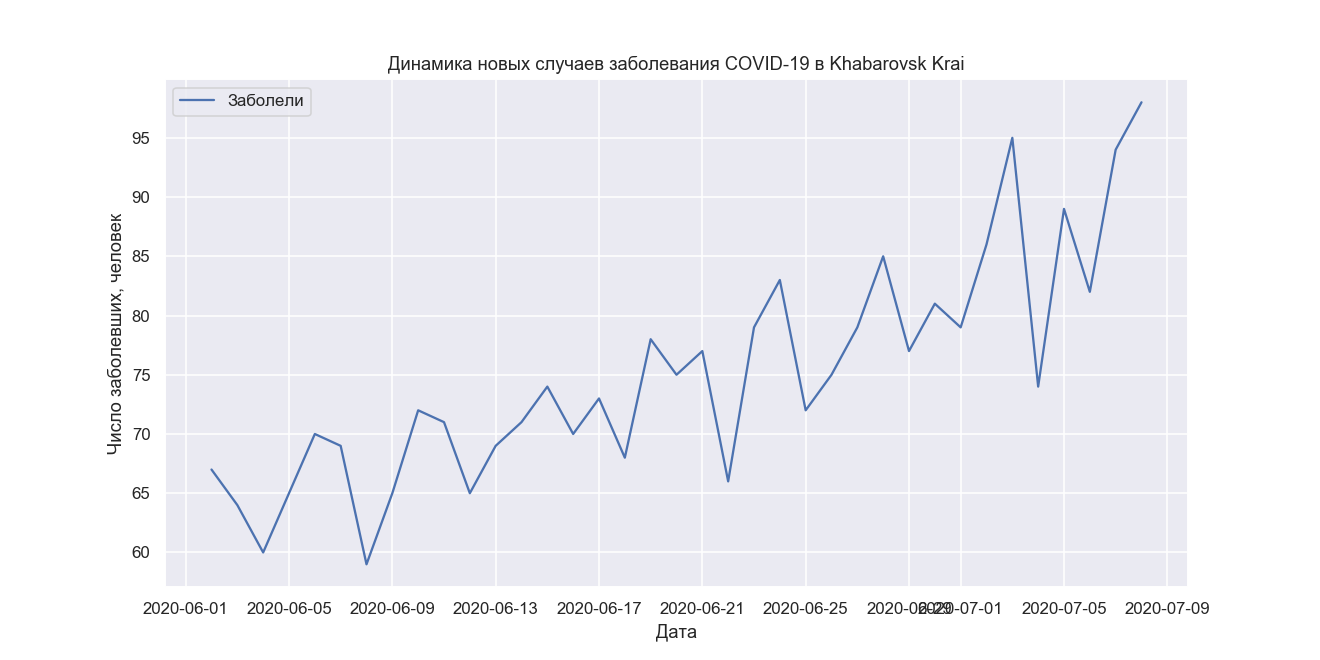

In [195]:
new_cases_visualizator_for_russia(d_russia, 'Khabarovsk Krai')

<IPython.core.display.Javascript object>


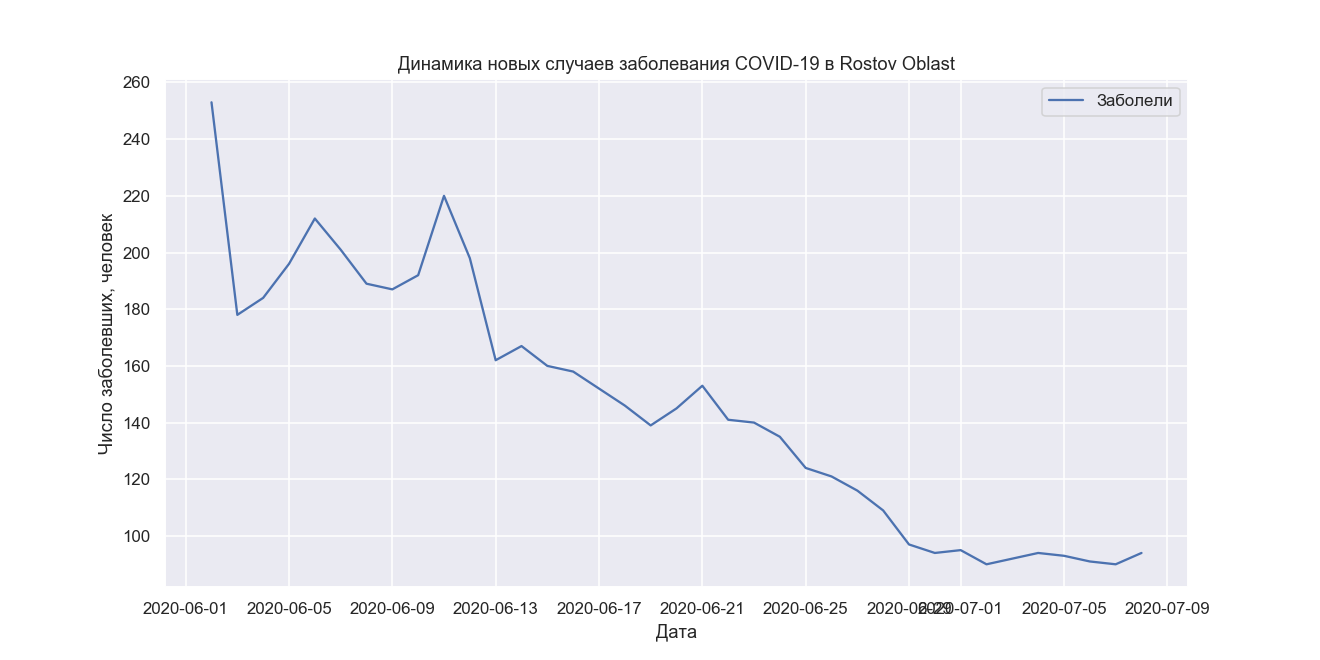

In [201]:
new_cases_visualizator_for_russia(d_russia, 'Rostov Oblast')

In [172]:
region_names = d_russia.loc[:, 'Province/State'].unique()[1:]
region_names

array(['Adygea Republic', 'Altai Krai', 'Altai Republic', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast', 'Bashkortostan Republic',
       'Belgorod Oblast', 'Bryansk Oblast', 'Buryatia Republic',
       'Chechen Republic', 'Chelyabinsk Oblast',
       'Chukotka Autonomous Okrug', 'Chuvashia Republic',
       'Dagestan Republic', 'Ingushetia Republic', 'Irkutsk Oblast',
       'Ivanovo Oblast', 'Jewish Autonomous Okrug',
       'Kabardino-Balkarian Republic', 'Kaliningrad Oblast',
       'Kalmykia Republic', 'Kaluga Oblast', 'Kamchatka Krai',
       'Karachay-Cherkess Republic', 'Karelia Republic',
       'Kemerovo Oblast', 'Khabarovsk Krai', 'Khakassia Republic',
       'Khanty-Mansi Autonomous Okrug', 'Kirov Oblast', 'Komi Republic',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Mordovia Republic', 'Moscow', 'Moscow Oblas

In [179]:
def new_cases_visualizator_for_russia_all_region(data, region_name_array):
    plt.figure(figsize=[10.0, 5.0], dpi=100)
    plt.yscale('log')
    for region_name in region_name_array:
        d = data[data['Province/State'] == region_name]
        d_cdr = d.groupby('Date_date')[['Confirmed', 'Deaths', 'Recovered']].sum()

        new_cases = new_cases_parser_for_russia(d_cdr)
        
        plt.plot(d_cdr.index[1:],
                 new_cases,
                 label=region_name)
    
    plt.title(f'Динамика новых случаев заболевания COVID-19 по регионам России')
    plt.ylabel('Число заболевших, человек')
    plt.xlabel('Дата')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


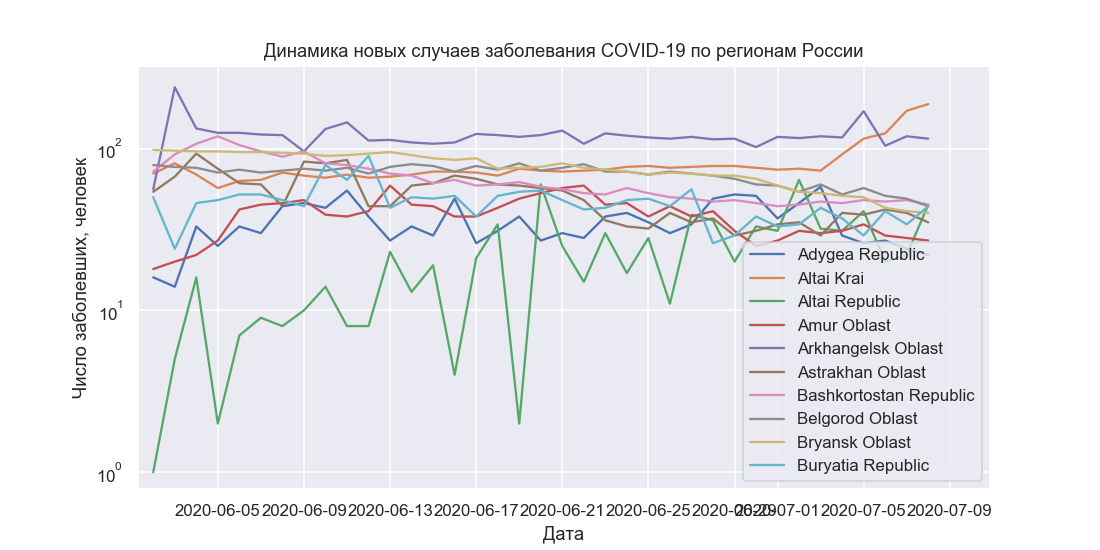

In [180]:
new_cases_visualizator_for_russia_all_region(d_russia, region_names[:10])